# Practical Geochemistry and Data Analysis
# Programming assignment

The oxygen isotopic composition of seawater varies with the amount of light oxygen locked up in ice sheets over glacial cycles, and more heavy oxygen is incorporated in the shells of foraminifera growing in colder water. Geomagnetic dating of sediments on the ocean floor and measurement of isotopic ratios for fossil foraminifera in the sediments therefore provide proxy records of past climates.

The assignment folder contains data from five sites, each saved across four files: site577.1.txt, site577.2.txt, etc. Each file contains ages (Ma) and $\delta^{18}$O (&#x2030;) in foraminifera extracted from a deep-sea sediment core. The first part of the assignment is to write a Python program that will:
- plot the $\delta^{18}$O series from all files against age on a single graph, using the same symbol and colour for data from each of the five sites.
- add a second axis or a scale bar showing temperature from 0 to 12$^\circ$C given by $T=12-4\delta^{18}$O
- add lines and labels to identify the paleocene (65 to 56 Ma before present), eocene (56 to 33.9 Ma), oligocene (33.9 to 23 Ma), miocene (23 to 5.33 Ma) and pliocene (5.33 to 2.58 Ma) epochs
- calculate the averages of the $\delta^{18}$O values for each epoch
- fit a straight line to the whole dataset and report the trend in $\delta^{18}$O per Ma, along with a graph showing the fit.
- fit a straight line to each epoch and report the trends in $\delta^{18}$O per Ma per epoch, along with a graph showing the fits.


Your Notebook will be your final report. Use Markdown cells to write your report and the outputs of Python cells to embed graphs. Use at least one markdown cell, with a header, for each bullet point above, with the python code for that tasy cleary linked to that markdown cell. Download the Notebook as a pdf and submit to LEARN. Help with markdown syntax can be found online, for example [here](https://www.markdownguide.org/cheat-sheet/).

Your Notebook report should include:

- each of the figures outlined above
- the $\delta^{18}$O averages as a table
- the trends of $\delta^{18}$O per Ma for the whole period and each epoch as a table
- add sufficient text to explain what the figures and the tables show (you don’t have to go into details of geochemistry or paleoclimate; this is just an assessment of the programming part of the course)
- make sure that the code cells are well written and appropriately commented
- upload your pdf file to the Programming Assignment box in the Programming and data analysis Semester 1 folder on Learn.

It is up to you to decide how to make a clear presentation of the data, but remember the guidlines given in the background document for the Data Visualization practical. This assignment is worth 25% of the course marks and will be marked out of 100 with a mark breakdown as follows: 

Program that correctly performs all requested tasks (40%): 
 - Does the program run without errors? 
 - Does the program output the correct results?
 - Does the program do all requested tasks?
 
Code that is concise and easy to understand (30%): 
 - How easy is your code to read and understand
 - Is your code well commented?
 - Are you working with variables (good!) or have you hard-coded numbers into the analysis code (bad)
 - Are the variable names appropriate and descriptive?
 - Are you using functions? 
 - Are you following good coding practices as described throughout the individual workshops? 

Presentation of the document (30%)
 - Is the use of colour appropriate or excessive/unnecessary? 
 - Are all figure axes clearly labelled with correct units? 
 - Are you using line markers and marker symbols to differentiate between datasets?
 - Have figure legends been used appropriately? 
 - Have you avoided redundant information in the figures (e.g., repetition of figure title, caption, axis labels) 
 - Have you followed good visualisation practices as described in the individual workshops?
 - Are axis scales appropriate? 
 - Is the accompanying text well written, descriptive and grammatically correct? 
 
 In addition, we will also be following the University of Edinburgh's common marking scheme found here: https://www.ed.ac.uk/ppls/linguistics-and-english-language/current/undergraduate/assessment/common-marking-scheme 



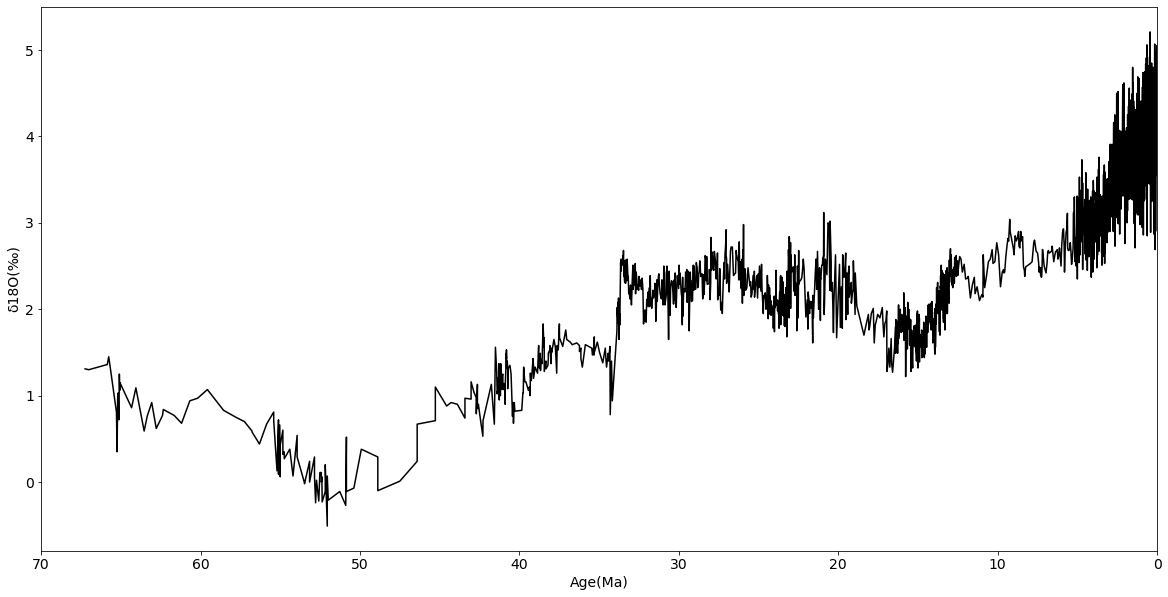

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#First, I would like the set a readable size for my graph, as well as the x-axis from 70Ma to present from left to right.
#It is conventional for geoscientists to visualize time moving forwards in time towards the right. 

plt.figure(figsize=(20,10))
plt.xlim(70,0)

#Next,I imported the glob module from the glob method.
#This return a list of file in the current directory for files ending with .txt. I named this list 'files'.
    #reference: https://stackoverflow.com/questions/22431921/abbreviate-the-import-of-multiple-files-with-loadtxt-python
#Then, I created an empty list named 'my list'. I looped the 'files' list for np.loadtxt.
#I appended all the loaded files into the empty list

from glob import glob

files=glob("*.txt")
mylist=[]
for i in files:
    mylist.append(np.loadtxt(i,skiprows=1))

#'my list' now contains many arrays. I concatenated the arrays into one array and named it allsites
#Because the 'allsites' array is not ordered with increasing age, if I wanted to use the data to make 
#a scatterplot with the markers connected, it will give me wrongly connected points. 
#I will sort the data according to the ages in column 0, such that the O18 data
#will remain assigned to the age point in the original files. I named this array 'a'.
    #reference :https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column

allsites=np.concatenate(mylist)
a=allsites[allsites[:, 0].argsort()] 

#I will now create two loops that will read and extract age from column 0 and O18 from column 1 in array a.
#I named the two lists age and O18, then plotted them together with the appropriate formatting and labels.
    #reference: https://stackoverflow.com/questions/903853/how-do-you-extract-a-column-from-a-multi-dimensional-array

age=[row[0] for row in a]
O18=[row[1] for row in a]
plt.plot(age,O18,"-",color="black")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Age(Ma)",fontsize=14)
plt.ylabel("\u03B418O(‰)",fontsize=14)

plt.show()




Figure 1. dO18(‰) from deep-sea sediment foraminifera records collected from five sites plotted against age

The upper limit for the temperature axis is  -12
The lower limit for the temperature axis is  16


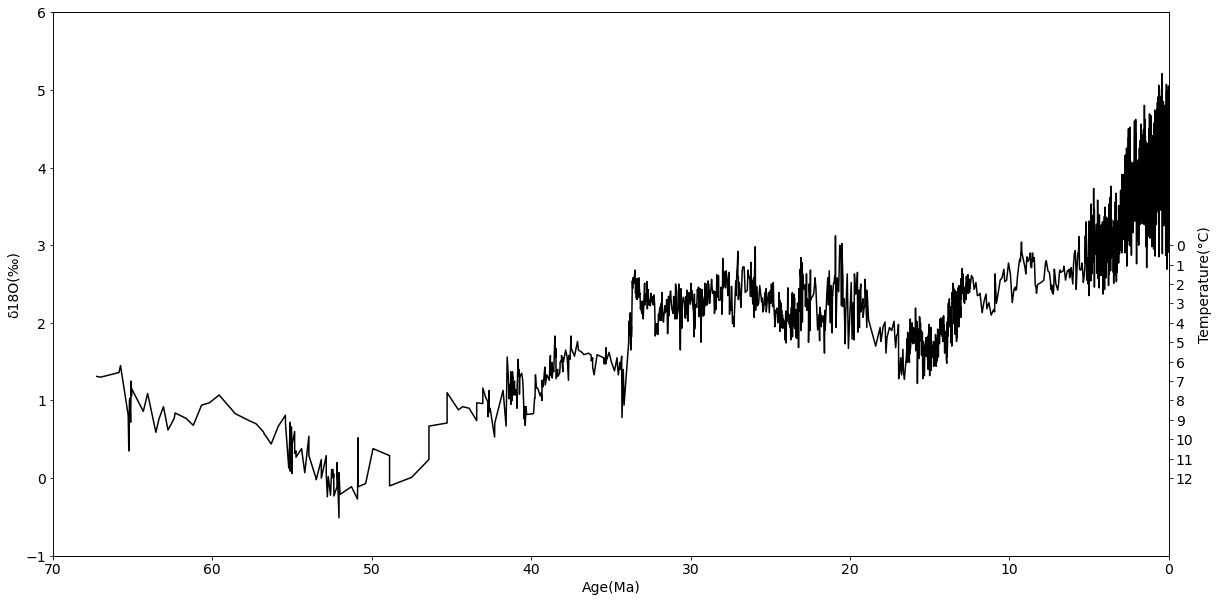

In [2]:
#Before entering code for the second question, first I will insert code from question 1 relevant to this section
plt.figure(figsize=(20,10))
plt.ylim(-1,6)
plt.xlim(70,0)
plt.plot(age,O18,"-",color="black")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Age(Ma)",fontsize=14)
plt.ylabel("\u03B418O(‰)",fontsize=14)

#Given that the relationship between 𝛿18O and temperature is related by the equation 𝑇=12−4𝛿18 O,
#I will calculate the temperature limits by inputting the upper and lower limits of the 𝛿18O y-axis into the equation.

T_uplim=12-4*(6)
print("The upper limit for the temperature axis is ", T_uplim)

T_lowlim=12-4*(-1)
print("The lower limit for the temperature axis is ", T_lowlim)

#Now that I know the upper limit and lower limit of the temperature axis is -12 and 16, I will show tick marks
#for only the values in the given list of 0-12.

plt.twinx()
plt.ylim(16,-12)
plt.yticks([12,11,10,9,8,7,6,5,4,3,2,1,0],fontsize=14)
plt.ylabel("Temperature(°C)",fontsize=14)

plt.show()


Figure 2. dO18(‰) of deep sea sediment records and ocean temperature(°C) against age

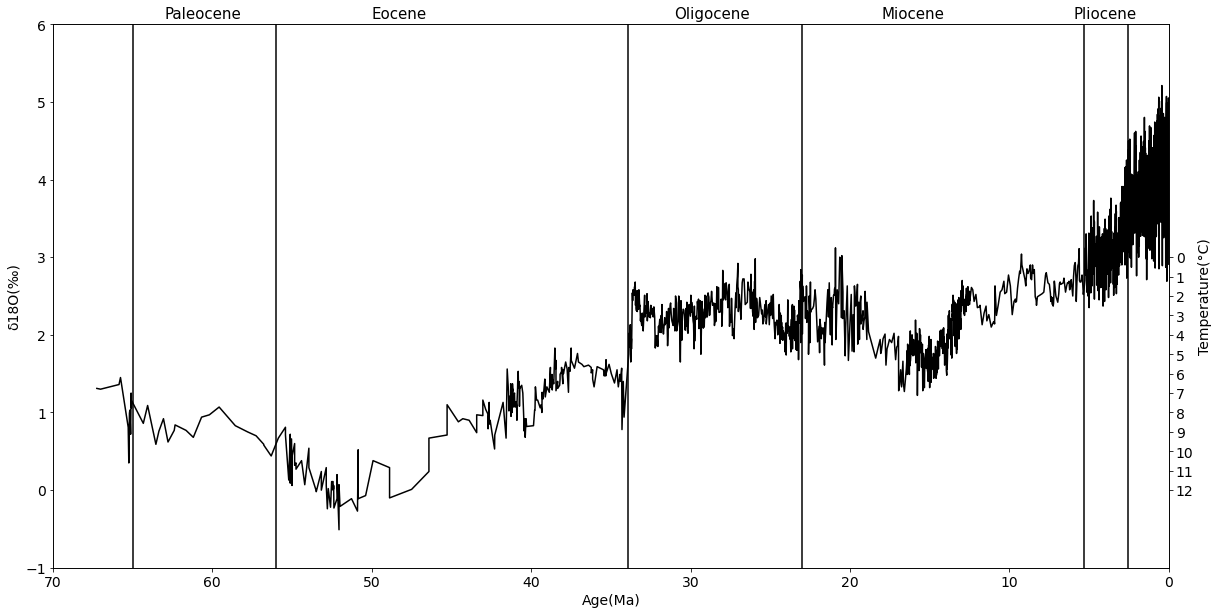

In [3]:
#First, I will insert code from question 1 and 2 relevant to this section
plt.figure(figsize=(20,10))
plt.ylim(-1,6)
plt.xlim(70,0)
plt.plot(age,O18,"-",color="black")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Age(Ma)",fontsize=14)
plt.ylabel("\u03B418O(‰)",fontsize=14)

plt.twinx()
plt.ylim(16,-12)
plt.yticks([12,11,10,9,8,7,6,5,4,3,2,1,0],fontsize=14)
plt.ylabel("Temperature(°C)",fontsize=14)

#Here, I plotted lines and labels corresponding to the given ages
plt.axvline(x=65,color="black")
plt.text(63, -12.3, "Paleocene",fontsize=15)
plt.axvline(x=56,color="black")
plt.text(50, -12.3, "Eocene",fontsize=15)
plt.axvline(x=33.9,color="black")
plt.text(31, -12.3, "Oligocene",fontsize=15)
plt.axvline(x=23,color="black")
plt.text(18, -12.3, "Miocene",fontsize=15)
plt.axvline(x=5.33,color="black")
plt.text(6, -12.3, "Pliocene",fontsize=15)
plt.axvline(x=2.58,color="black")

plt.show()

Figure 3. Changes in dO18(‰) and ocean temperature(°C) against age. The epochs limits are indicated with vertical lines.

In [4]:
#To create a table storing my O18 values for each epoch, I will first install a useful package.
    #reference: https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd

!pip install tabulate
from tabulate import tabulate

#Next, I will define a function to calculate the mean. The mean values are rounded to four decimal points.

def mean(x):
    return round(sum(x)/len(x),4)

#I will not be able to use np.logical_and() if'age' and 'O18' are lists
#Now, I will convert my 'age', 'O18' lists into arrays

age_arr=np.array(age)
O18_arr=np.array(O18)

#Using np.logical_and(), I will assign an epoch name to the corresponding section of the array.
#The mean function is used to calculate the mean O18 values for the specified age range

pal = np.logical_and(age_arr>56,age_arr<65)   
meanpal=mean(O18_arr[pal])

eo = np.logical_and(age_arr>33.9,age_arr<56)   
meaneo=mean(O18_arr[eo])

oli = np.logical_and(age_arr>23,age_arr<33.9)   
meanoli=mean(O18_arr[oli])

mio = np.logical_and(age_arr>5.33,age_arr<23)   
meanmio=mean(O18_arr[mio])

plio = np.logical_and(age_arr>2.58,age_arr<5.33)   
meanplio=mean(O18_arr[plio])

#To create a table, I have made two lists each containing the mean values and the epoch names. 

meanvalues=["Mean dO18(‰)",meanpal,meaneo,meanoli,meanmio,meanplio]
meanwords=["Epoch","Paleocene","Eocene","Oligocene","Miocene","Pliocene"]

#I will zip them together into two columns,and make it into a table using tabulate
    #reference: https://stackoverflow.com/questions/41468116/python-how-to-combine-two-flat-lists-into-a-2d-array

meantable=np.array(list(zip(meanwords, meanvalues))) 
print(tabulate(meantable,headers='firstrow',tablefmt='grid'))

+-----------+----------------+
| Epoch     |   Mean dO18(‰) |
+===========+================+
| Paleocene |         0.7774 |
+-----------+----------------+
| Eocene    |         1.0073 |
+-----------+----------------+
| Oligocene |         2.2628 |
+-----------+----------------+
| Miocene   |         2.1171 |
+-----------+----------------+
| Pliocene  |         3.141  |
+-----------+----------------+


Table 1. The average dO18(‰) values for each epoch

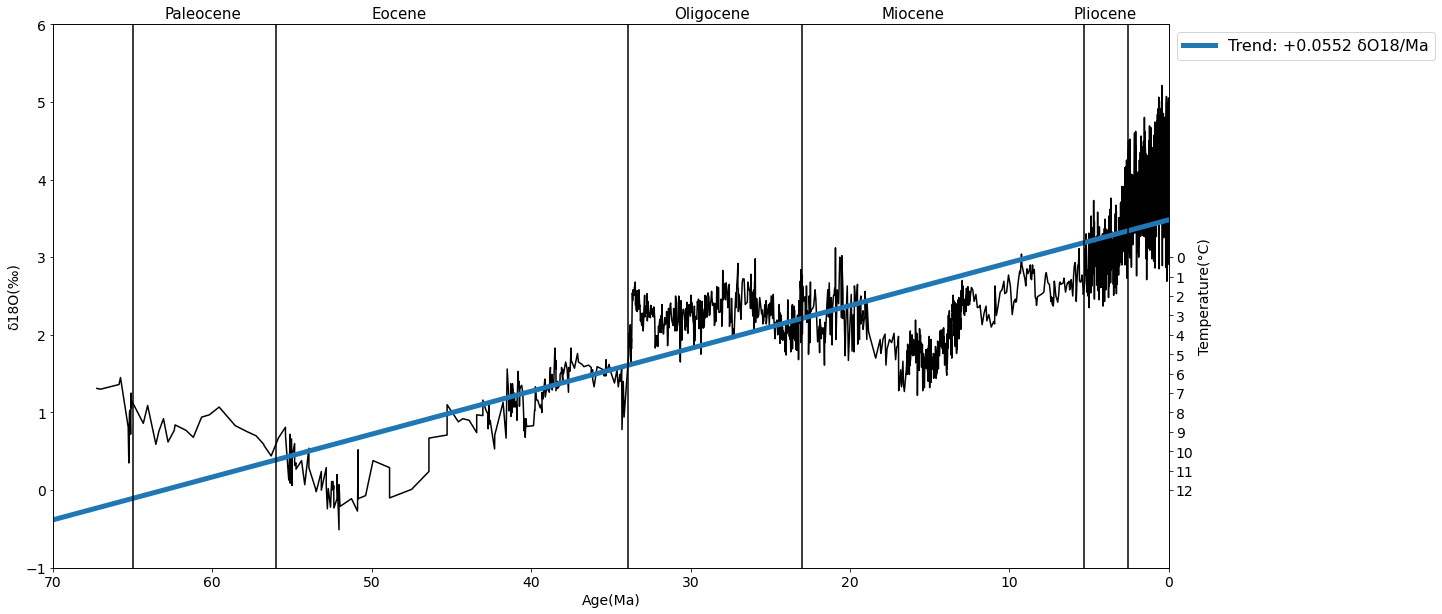

In [5]:
#First, I will insert code from question 1 relevant to this section. I will include previous code from question 2 
#and 3 for the secondary axis and associated lines after plotting the trend for 𝛿18 O.

plt.figure(figsize=(20,10))
plt.ylim(-1,6)
plt.xlim(70,0)
plt.plot(age,O18,"-",color="black")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Age(Ma)",fontsize=14)
plt.ylabel("\u03B418O(‰)",fontsize=14)

#Here, I will use stats.linregress() to calculate a linear model for my age and 𝛿18 O data. 
#I rounded my data to four decimals ponts.

m,c,_,_,_=stats.linregress(age,O18)
m1=round(m,4)

#As python is not aware that time 0 is present, the O18 trend(m2) will give me a reversed sign, which will 
#inaccurately tell me how O18 is changing with increasing time.
#In order to solve this issue, I will define a function to change all positive signs to negative signs and vice versa.

def convert(x):
    return x*-1

m2=convert(m1)

#I would like all the m1 values to display its +/- sign, so I can show whether it is a positive or negative trend
#The following line of code does precisely this. The f string allows for the formatting within {} brackets. 
#In this case, the plus sign means to show the sign of the m2 number regardless if it is positive or negative. 
    #reference: https://bobbyhadz.com/blog/python-print-sign-of-number

m3=f'{m2:+}' 

c1=round(c,4)

#The following lines will specify the x values of the line to be the length of the age data
agefit=np.arange(len(age))
O18fit = c1 + m1*agefit

#Then I will plot my fitted line. The label will specify the trend(m3) calculated.
plt.plot(agefit,O18fit,linewidth=5,label='Trend: '+m3+' \u03B4O18/Ma')

#To ensure the epoch lines that I will plot won't overlap my legend, I will use the bbox_to_anchor keyword
#to place the legend outside of my graph with the specified coordinates
    #reference: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
plt.legend(bbox_to_anchor=(1.0, 1.0),loc='upper left',fontsize=16)

#Here I will rename my m3 variable 'trend' for the next question
trend=m3

#Finally, I will insert code from questions 2,3 relevant to this section
plt.twinx()
plt.ylim(16,-12)
plt.yticks([12,11,10,9,8,7,6,5,4,3,2,1,0],fontsize=14)
plt.ylabel("Temperature(°C)",fontsize=14)

plt.axvline(x=65,color="black")
plt.text(63, -12.3, "Paleocene",fontsize=15)
plt.axvline(x=56,color="black")
plt.text(50, -12.3, "Eocene",fontsize=15)
plt.axvline(x=33.9,color="black")
plt.text(31, -12.3, "Oligocene",fontsize=15)
plt.axvline(x=23,color="black")
plt.text(18, -12.3, "Miocene",fontsize=15)
plt.axvline(x=5.33,color="black")
plt.text(6, -12.3, "Pliocene",fontsize=15)
plt.axvline(x=2.58,color="black")

plt.show()

Figure 4. A dO18(‰) linear regression fitted for the entire data set. There is a 0.0552‰ dO18 per Ma increase from 70Mya to present.

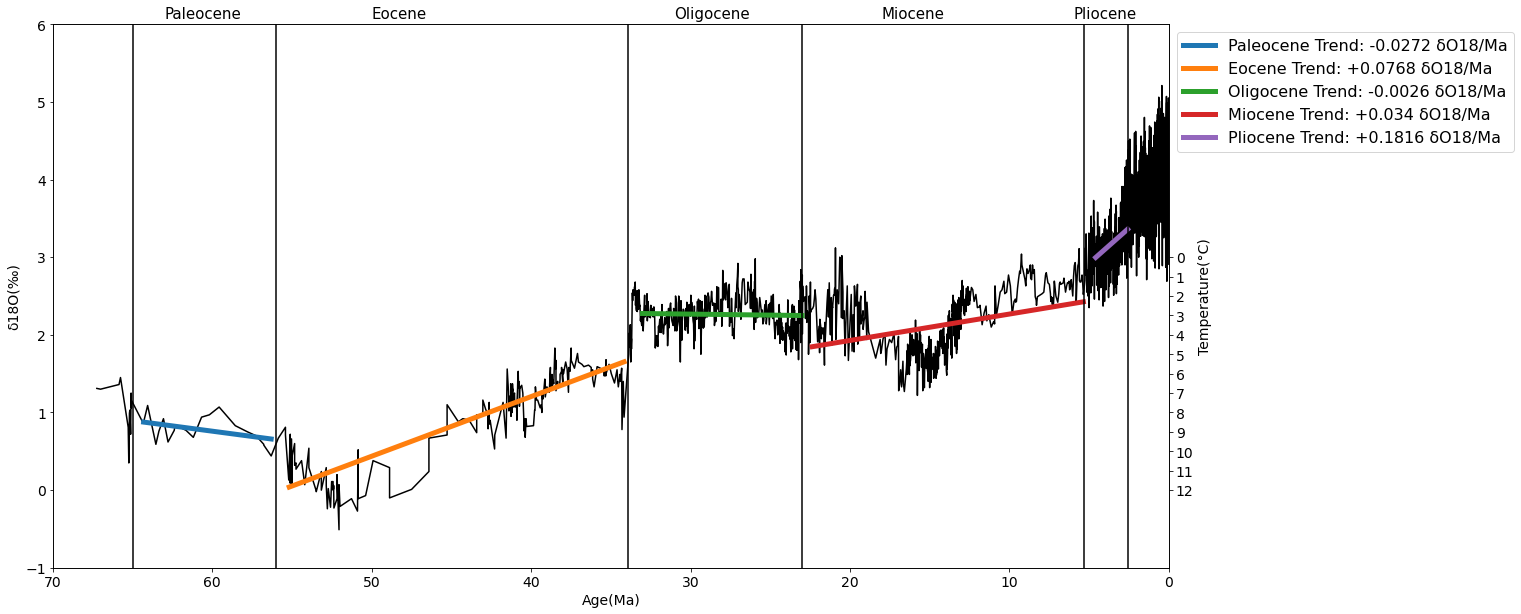

In [6]:
#First, I will insert code from the preivous questions relevant to this section. 
plt.figure(figsize=(20,10))
plt.ylim(-1,6)
plt.xlim(70,0)
plt.plot(age,O18,"-",color="black")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Age(Ma)",fontsize=14)
plt.ylabel("\u03B418O(‰)",fontsize=14)

#Here I have defined a function with variables u,q,l
#inputing u,q,l - age of the epoch, O18 of the epoch, and epoch name- will output a linear regression plot

def trendfunc(u,q,l):
    m,c,_,_,_=stats.linregress(u,q)
    m1=round(m,4)
    m2=convert(m1)
    m3=f'{m2:+}' 
    c1=round(c,4)
    
    #The following code specifies that the linear regression will be plotted between 
    #minimum and maximum values of u, or age. This will give me a linear regression specific to the epoch.
    
    u1=np.arange(min(u),max(u),1)
    q=c1+m1*u1
    
    #Then the linear regresssion plot is plotted. The label will specify the epoch name(l) and trend(m3).
    plt.plot(u1,q,linewidth=5,label=l+' Trend: '+m3+' \u03B4O18/Ma')
    return(m3)

#Next, I have defined the epoch limits, and used the function to create 5 linear regressions for the epochs

pal = np.logical_and(age_arr>56,age_arr<65) 
trend1 =trendfunc(age_arr[pal],O18_arr[pal],"Paleocene")

eo = np.logical_and(age_arr>33.9,age_arr<56)   
trend2 =trendfunc(age_arr[eo],O18_arr[eo],"Eocene")

oli = np.logical_and(age_arr>23,age_arr<33.9)   
trend3 =trendfunc(age_arr[oli],O18_arr[oli],"Oligocene")

mio = np.logical_and(age_arr>5.33,age_arr<23)   
trend4 =trendfunc(age_arr[mio],O18_arr[mio],"Miocene")

plio = np.logical_and(age_arr>2.58,age_arr<5.33)   
trend5 =trendfunc(age_arr[plio],O18_arr[plio],"Pliocene")

plt.legend(bbox_to_anchor=(1.0, 1.0),loc='upper left',fontsize=16)

#I will insert code from questions 2,3 relevant to this section
plt.twinx()
plt.ylim(16,-12)
plt.yticks([12,11,10,9,8,7,6,5,4,3,2,1,0],fontsize=14)
plt.ylabel("Temperature(°C)",fontsize=14)

plt.axvline(x=65,color="black")
plt.text(63, -12.3, "Paleocene",fontsize=15)
plt.axvline(x=56,color="black")
plt.text(50, -12.3, "Eocene",fontsize=15)
plt.axvline(x=33.9,color="black")
plt.text(31, -12.3, "Oligocene",fontsize=15)
plt.axvline(x=23,color="black")
plt.text(18, -12.3, "Miocene",fontsize=15)
plt.axvline(x=5.33,color="black")
plt.text(6, -12.3, "Pliocene",fontsize=15)
plt.axvline(x=2.58,color="black")

plt.show()

Figure 5. dO18(‰) linear regressions shown for each  epoch from 70Mya to present.

In [7]:
#Using the same tabulate method, I have noted down the trends shown on the graph.

O18values=["dO18(‰) per Ma",trend,trend1,trend2,trend3,trend4,trend5]
O18words=["Epoch","Whole period","Paleocene","Eocene","Oligocene","Miocene","Pliocene"]
trendtable=np.array(list(zip(O18words, O18values))) 
print(tabulate(trendtable,headers='firstrow',tablefmt='grid'))

+--------------+------------------+
| Epoch        |   dO18(‰) per Ma |
+==============+==================+
| Whole period |           0.0552 |
+--------------+------------------+
| Paleocene    |          -0.0272 |
+--------------+------------------+
| Eocene       |           0.0768 |
+--------------+------------------+
| Oligocene    |          -0.0026 |
+--------------+------------------+
| Miocene      |           0.034  |
+--------------+------------------+
| Pliocene     |           0.1816 |
+--------------+------------------+


Table 2. The dO18(‰) trend for each epoch and the entire period from past to present